In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# from scratch liner Regression

In [3]:
#import numpy as np

import matplotlib.pyplot as plt
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000, penalty = None):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.penalty = penalty
    
    def fit(self, X, y):
        self.X=X
        self.y=y
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        tol = 1e-5
        prev_loss = 0
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)))
            # add regularization derevitive terme
            if self.penalty == 'l1':
                dw += self.lr * np.sign(self.weights)
            elif self.penalty == 'l2':
                dw += self.lr * 2 * self.weights
            db = (1/n_samples) * (np.sum(y_pred - y))
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
            current_loss = np.mean(np.square(y_pred - y))
            
            if abs(current_loss - prev_loss) < tol:
                break
                
            prev_loss = current_loss
        
            
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
import numpy as np
np.random.seed(0)  # برای تکرارپذیری
X = 2 * np.random.rand(100, 1)  # 100 نمونه با یک ویژگی
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + نویز

C:\Users\Markazi___PC\AppData\Local\Temp\ipykernel_47840\2142248727.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


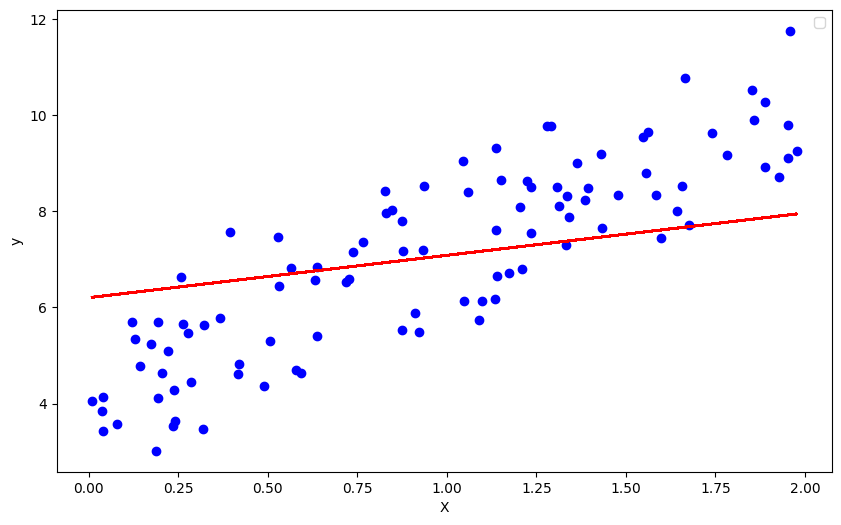

In [5]:
# داده‌های نمونه
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# آموزش مدل
model = LinearRegression()
model.fit(X, y)
y_pred=model.predict(X)
# پیش‌بینی
plt.figure(figsize=(10, 6))
#plt.subplot(1,1,1)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# from scratch Regression Logstic

In [4]:
import numpy as np

class Reg_logstic():
    def __init__(self, X, y, num_iter=1000, alpha=0.01):
        self.X = X
        self.y = y
        self.num_iter = num_iter
        self.alpha = alpha
        self.intercept = np.ones((X.shape[0], 1))

    def add_intercept(self):
        return np.concatenate((self.intercept, self.X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calc_h(self, X, theta):
        z = np.dot(X, theta)
        return self.sigmoid(z)

    def cost_function(self):
        XX = self.add_intercept()
        theta = np.zeros(XX.shape[1])
        m = self.y.size
        cost_list = []

        for i in range(self.num_iter):
            h = self.calc_h(XX, theta)
            cost = (-self.y * np.log(h) - (1 - self.y) * np.log(1 - h)).mean()
            cost_list.append(cost)

            gradient = np.dot(XX.T, (h - self.y)) / m
            theta -= self.alpha * gradient

            if i % 100 == 0:
                print(f"Iteration {i} | Cost: {cost}")

        print(f"Final Cost: {cost}")
        print(f"Coefficients: {theta}")
        return theta, cost_list

    

In [ ]:
X, y = make_classification(
        n_samples=100, 
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1, 
        n_clusters_per_class=1)

In [6]:
(X.shape, y.shape)

((100, 2), (100,))

In [7]:
Rel=Reg_logstic(X, y, num_iter=1000, alpha=0.01)
XX=Rel.add_intercept()
theta = np.zeros(XX.shape[1])
h=Rel.calc_h(XX,theta)
cost=Rel.cost_function()
print(XX)

Iteration 0 | Cost: 0.6931471805599453
Iteration 100 | Cost: 0.4836403778054387
Iteration 200 | Cost: 0.36260936219223994
Iteration 300 | Cost: 0.2873571461618231
Iteration 400 | Cost: 0.23712812376517192
Iteration 500 | Cost: 0.20159342967068664
Iteration 600 | Cost: 0.17527030182313344
Iteration 700 | Cost: 0.155046984054848
Iteration 800 | Cost: 0.1390492567006842
Iteration 900 | Cost: 0.12608965576239464
Final Cost: 0.115480818233492
Coefficients: [-0.00925468 -2.13694733 -0.05143972]
[[ 1.         -1.04948638  0.8786438 ]
 [ 1.          0.8780991   0.89551051]
 [ 1.          0.95928819  1.03967316]
 [ 1.         -1.18013412  1.12062155]
 [ 1.         -0.90731836  1.06040861]
 [ 1.         -0.62754626  1.37661405]
 [ 1.          0.82178321  1.18947778]
 [ 1.         -1.20376927  0.78801845]
 [ 1.          0.77151441  0.345716  ]
 [ 1.         -0.493857    1.66752297]
 [ 1.          1.17456965  0.69211449]
 [ 1.          0.82798737  0.84806927]
 [ 1.          0.89189141  0.87699465]

In [75]:
cost=Rel.cost_function()


Iteration 0 | Cost: 0.6931471805599453
Iteration 100 | Cost: 0.4836403778054387
Iteration 200 | Cost: 0.36260936219223994
Iteration 300 | Cost: 0.2873571461618231
Iteration 400 | Cost: 0.23712812376517192
Iteration 500 | Cost: 0.20159342967068664
Iteration 600 | Cost: 0.17527030182313344
Iteration 700 | Cost: 0.155046984054848
Iteration 800 | Cost: 0.1390492567006842
Iteration 900 | Cost: 0.12608965576239464
Final Cost: 0.115480818233492
Coefficients: [-0.00925468 -2.13694733 -0.05143972]


In [76]:
print(theta)


[0. 0. 0.]


In [77]:
print(h)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [78]:
print(f"\{cost}")

\(array([-0.00925468, -2.13694733, -0.05143972]), [0.6931471805599453, 0.6903892962200038, 0.687647684466082, 0.6849222488327551, 0.6822128930992037, 0.6795195212965593, 0.6768420377150776, 0.674180346911138, 0.6715343537140762, 0.6689039632328442, 0.666289080862505, 0.6636896122905587, 0.6611054635031042, 0.6585365407908383, 0.655982750754892, 0.6534440003125027, 0.650920196702534, 0.6484112474908303, 0.6459170605754221, 0.6434375441915714, 0.6409726069166672, 0.6385221576749717, 0.6360861057422116, 0.6336643607500281, 0.6312568326902764, 0.6288634319191848, 0.6264840691613677, 0.6241186555137033, 0.6217671024490665, 0.619429321819932, 0.6171052258618359, 0.6147947271967106, 0.6124977388360832, 0.6102141741841486, 0.6079439470407139, 0.6056869716040167, 0.6034431624734219, 0.6012124346519956, 0.5989947035489589, 0.5967898849820265, 0.5945978951796268, 0.5924186507830095, 0.5902520688482414, 0.588098066848092, 0.58595656267381, 0.5838274746367964, 0.5817107214701691, 0.5796062223302294

# K-Meas

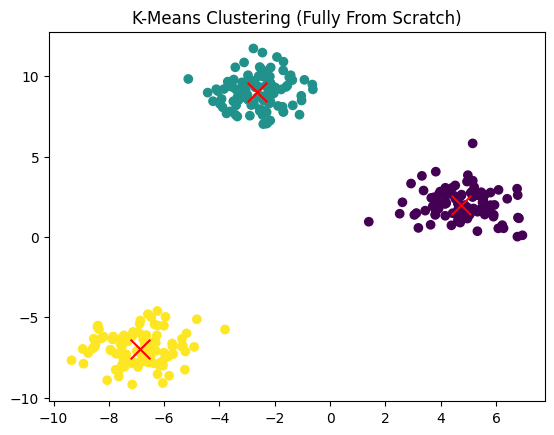

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- تابع میانگین مرکز خوشه (از خودت) ---
def centroid(x):
    length_x = x.shape[0]
    sum_x = np.sum(x, axis=0)
    return sum_x / length_x

# --- تابع فاصله اقلیدسی از صفر ---
def euclidean_distance(a, b):
    dist = 0
    for i in range(len(a)):
        dist += (a[i] - b[i]) ** 2
    return dist ** 0.5

# --- تابع پیدا کردن نزدیک‌ترین مرکز خوشه (کاملاً فرام اسکرچ) ---
def closest_centroid(x, centroids):
    min_dist = float('inf')
    closest_index = -1

    for i in range(len(centroids)):
        dist = euclidean_distance(x, centroids[i])
        if dist < min_dist:
            min_dist = dist
            closest_index = i
    return closest_index

# --- کلاس KMeans از صفر ---
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def fit(self, X):
        # انتخاب تصادفی مراکز اولیه
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # اختصاص هر نقطه به نزدیک‌ترین مرکز
            labels = []
            for point in X:
                c = closest_centroid(point, self.centroids)
                labels.append(c)
            labels = np.array(labels)

            # به‌روزرسانی مراکز خوشه با تابع centroid()
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[labels == i]
                if len(cluster_points) > 0:
                    new_centroids.append(centroid(cluster_points))
                else:
                    new_centroids.append(self.centroids[i])  # اگر خوشه خالی بود، همان مرکز قبلی حفظ شود
            new_centroids = np.array(new_centroids)

            # بررسی همگرایی
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        preds = []
        for point in X:
            preds.append(closest_centroid(point, self.centroids))
        return np.array(preds)

# --- تست الگوریتم ---
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(k=3)
kmeans.fit(X)

# --- نمایش نتایج ---
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200)
plt.title("K-Means Clustering (Fully From Scratch)")
plt.show()
